In [1]:
import sympy as sp
from sympy import diff,dsolve,simplify,Function,I

In [2]:
a = Function('a')
b = Function('b')
ada = Function('ada')
bdb = Function('bdb')
adb = Function('adb')
mu = sp.Symbol('mu',real=False)
Gamma = sp.Symbol('Gamma',real=True,positive=True)
omega = sp.Symbol('omega',real=True,positive=True)
omegaL = sp.Symbol('omega_L',real=True,positive=True)
J = sp.Symbol('J',real=False)
Lambda_a = sp.Symbol('Lambda_a',real=True,positive=True)
Lambda_b = sp.Symbol('Lambda_b',real=True,positive=True)
Epsilon = sp.Symbol('Epsilon',real=True,positive=True)
t = sp.Symbol('t',real=True)


In [3]:
eq1 = diff(a(t),t,1)+(Lambda_a/2+I*omega)*a(t)+I*sp.exp(-I*omegaL*t)*Epsilon
r1 = dsolve(eq1,ics={a(0):0})

In [4]:
r1 = r1.rhs
r1

-2*I*Epsilon*exp(-I*omega_L*t)/(Lambda_a + 2*I*omega - 2*I*omega_L) + 2*I*Epsilon*exp(-t*(Lambda_a/2 + I*omega))/(Lambda_a + 2*I*omega - 2*I*omega_L)

In [6]:
eq3 = diff(ada(t),t,1)+Lambda_a*ada(t)+2*sp.im(sp.exp(I*omegaL*t)*Epsilon*r1)
r3 = dsolve(eq3,ics={ada(0):0})
r3 = r3.rhs
r3

(4*Epsilon**2*Lambda_a**2*exp(-Lambda_a*t)/(Lambda_a**2 + 4*omega**2 - 8*omega*omega_L + 4*omega_L**2) + 16*Epsilon**2*omega**2*exp(-Lambda_a*t)/(Lambda_a**2 + 4*omega**2 - 8*omega*omega_L + 4*omega_L**2) - 32*Epsilon**2*omega*omega_L*exp(-Lambda_a*t)/(Lambda_a**2 + 4*omega**2 - 8*omega*omega_L + 4*omega_L**2) + 16*Epsilon**2*omega_L**2*exp(-Lambda_a*t)/(Lambda_a**2 + 4*omega**2 - 8*omega*omega_L + 4*omega_L**2) + 4*Epsilon**2 - 8*Epsilon**2*exp(-Lambda_a*t/2)*cos(t*(omega - omega_L)))/(Lambda_a**2 + 4*omega**2 - 8*omega*omega_L + 4*omega_L**2)

In [7]:
omega_val = 1
omegaL_val = omega_val
Epsilon_val = 0.1*omega_val
Gamma_val = 0.04*omega_val
kappa_val = 0.003*omega_val
Lambda_val = Gamma_val+kappa_val

r3f = r3.subs({Epsilon:Epsilon_val,omega:omega_val,\
               omegaL:omegaL_val,Gamma:Gamma_val,\
               Lambda_a:Lambda_val})
r3f

21.6333153055707 + 21.6333153055818*exp(-0.043*t) - 43.2666306111414*exp(-0.0215*t)

In [8]:
# ada的解析解
Lambda = sp.Symbol('Lambda')
ada_ana = 4*omega*Epsilon**2*(1-sp.exp(-1/2*Lambda*t))**2/Lambda**2
ada_anaf = ada_ana.subs({Epsilon:Epsilon_val,omega:omega_val,Lambda:Lambda_val})
ada_anaf

21.6333153055706*(1 - exp(-0.0215*t))**2

# 中期检查
检查检查$\langle a^\dagger a\rangle$是否正确

同时，如果$\langle a^\dagger a\rangle$正确的话，那么$\langle a \rangle$也必定正确，因为，
$$
\frac{d\langle a^\dagger a\rangle}{dt}=-\Lambda_a\langle a^\dagger a\rangle - 2Im\left\{e^{i\omega_Lt}\epsilon\langle a\rangle\right\}
$$

想要求解$\langle a^\dagger a\rangle$的话，必然要用到$\langle a \rangle$，所以如果$\langle a^\dagger a\rangle$正确的话，那么$\langle a \rangle$也必然正确。

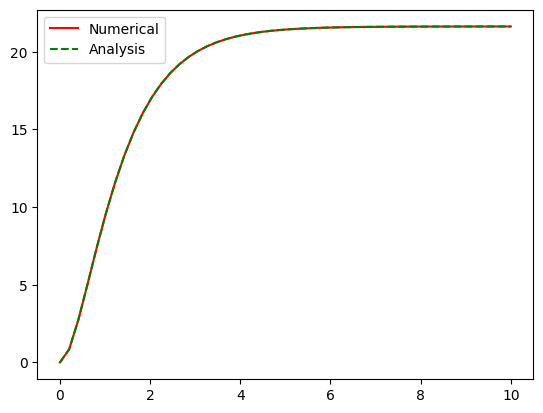

In [9]:
import numpy as np
import matplotlib.pyplot as plt

tlist = np.linspace(0,500)
r3ff = sp.lambdify(t,r3f,'numpy')
ada_anaf = sp.lambdify(t,ada_anaf,'numpy')

r3r = r3ff(tlist)
r3_ana = ada_anaf(tlist)
plt.plot(0.02*tlist,r3r,'r',label='Numerical')
plt.plot(0.02*tlist,r3_ana,'g--',label='Analysis')
plt.legend()
plt.xticks([0,2,4,6,8,10],["0","2","4","6","8","10"])
plt.show()

## 结果
正确！下面推导$\langle b^\dagger b\rangle$,并且验证是否正确


In [33]:
eq2 = diff(b(t),t,1)+(Lambda_b/2+I*omega)*b(t)-sp.conjugate(mu)*Gamma*r1
eq2 = eq2.subs({Epsilon:Epsilon_val,omega:omega_val,\
               omegaL:omegaL_val,Gamma:Gamma_val,\
               Lambda_a:Lambda_val,Lambda_b:Lambda_val,\
               mu:-I})
bt = sp.dsolve(eq2,ics={b(0):0})
bt

Eq(b(t), 0.186046511627907*I*t*exp(-t*(0.0215 + I)) + 8.65332612222823*I*exp(-t*(0.0215 + 1.0*I)) - 8.65332612222823*I*exp(-I*t))

In [34]:
btr=bt.rhs # 到底还能不能算出来？解个方程还需要这么久吗？我也是服了
# eq2

In [35]:
eq4 = diff(bdb(t),t,1)+Lambda_b*bdb(t)-2*sp.re(mu*Gamma*adb(t))
eq5 = diff(adb(t),t,1)+(Lambda_a+Lambda_b)/2*adb(t)\
    -sp.conjugate(mu)*Gamma*ada_ana-I*sp.exp(I*omegaL*t)*btr


In [37]:
# 最后算出来的总是差着一点，感觉应该就是一个小地方还存在着一点点的错误，因为下面的图就差一点
eq4 = eq4.subs({Epsilon:Epsilon_val,omega:omega_val,\
               omegaL:omegaL_val,Gamma:Gamma_val,\
               Lambda_a:Lambda_val,Lambda_b:Lambda_val,\
               mu:1})
eq5 = eq5.subs({Epsilon:Epsilon_val,omega:omega_val,\
               omegaL:omegaL_val,Gamma:Gamma_val,\
               Lambda_a:Lambda_val,Lambda_b:Lambda_val,\
               Lambda:Lambda_val,mu:1}).evalf()


eq5

-0.865332612222823*(1.0 - exp(-0.0215*t))**2 - I*(0.186046511627907*I*t*exp(-t*(0.0215 + I)) + 8.65332612222823*I*exp(-t*(0.0215 + 1.0*I)) - 8.65332612222823*I*exp(-I*t))*exp(I*t) + 0.043*adb(t) + Derivative(adb(t), t)

In [38]:
r2 = dsolve([eq4,eq5],ics={adb(0):0,bdb(0):0})
r2[0]

Eq(bdb(t), 0.0346133044889129*t**2*exp(-0.043*t) - 11.2694479731344*t*exp(-0.043*t) - 32.1984227803841*t*exp(-0.0215*t) + 411.840291377006 - 1609.92113901921*exp(-0.043*t) + 1198.0808476422*exp(-0.0215*t))

In [39]:
rb = r2[0].rhs
rb.evalf() # 已经算出解析解了

0.0346133044889129*t**2*exp(-0.043*t) - 11.2694479731344*t*exp(-0.043*t) - 32.1984227803841*t*exp(-0.0215*t) + 411.840291377006 - 1609.92113901921*exp(-0.043*t) + 1198.0808476422*exp(-0.0215*t)

In [40]:
# 论文中给出的解析解
bdb_ana = 16*omega*Gamma**2*Epsilon**2/Lambda**4\
        *(1+sp.exp(-Lambda*t/2)*(sp.exp(-Lambda*t/2)-2))
bdb_ana_f = bdb_ana.subs({Epsilon:Epsilon_val,omega:omega_val,\
               Gamma:Gamma_val,Lambda:Lambda_val})
bdb_ana_f

74.8800529776375*(-2 + exp(-0.0215*t))*exp(-0.0215*t) + 74.8800529776375

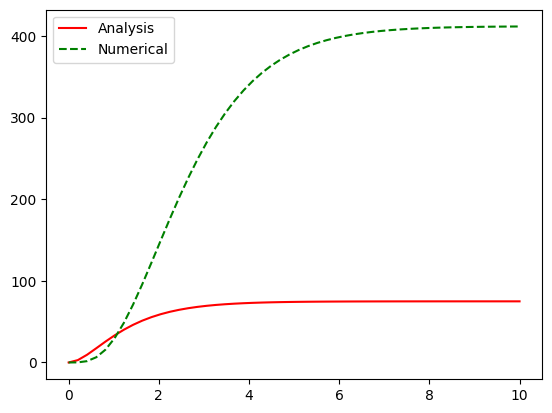

In [42]:
rbf = sp.lambdify(t,rb,'numpy')
rbr = rbf(tlist)
bdb_ana_ff = sp.lambdify(t,bdb_ana_f,'numpy')
rbana = bdb_ana_ff(tlist)
plt.plot(tlist*0.02,rbana,'r',label='Analysis')
plt.plot(tlist*0.02,rbr,'g--',label='Numerical')
plt.legend()

# 分析
上面的就是不一样，但是趋势好像是一样的，只是数值不一样，按照经验推测出错的地方应该很小。但是难就难在，论文中给出的解析解实在是太少了，我们没得对比，还是得仔细看论文中给出的公式有没有打错！

还有一点就是$\mu$的取值，但是看$E_B^{nr}(t)$的解析表达式中没有$\mu$这个$\mu$的取值应该是没有影响的吧